<h2><a href="https://leetcode.com/problems/count-servers-that-communicate">1267. Count Servers that Communicate</a></h2><h3>Medium</h3><hr><p>You are given a map of a server center, represented as a <code>m * n</code> integer matrix&nbsp;<code>grid</code>, where 1 means that on that cell there is a server and 0 means that it is no server. Two servers are said to communicate if they are on the same row or on the same column.<br />
<br />
Return the number of servers&nbsp;that communicate with any other server.</p>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>

<p><img alt="" src="https://assets.leetcode.com/uploads/2019/11/14/untitled-diagram-6.jpg" style="width: 202px; height: 203px;" /></p>

<pre>
<strong>Input:</strong> grid = [[1,0],[0,1]]
<strong>Output:</strong> 0
<b>Explanation:</b>&nbsp;No servers can communicate with others.</pre>

<p><strong class="example">Example 2:</strong></p>

<p><strong><img alt="" src="https://assets.leetcode.com/uploads/2019/11/13/untitled-diagram-4.jpg" style="width: 203px; height: 203px;" /></strong></p>

<pre>
<strong>Input:</strong> grid = [[1,0],[1,1]]
<strong>Output:</strong> 3
<b>Explanation:</b>&nbsp;All three servers can communicate with at least one other server.
</pre>

<p><strong class="example">Example 3:</strong></p>

<p><img alt="" src="https://assets.leetcode.com/uploads/2019/11/14/untitled-diagram-1-3.jpg" style="width: 443px; height: 443px;" /></p>

<pre>
<strong>Input:</strong> grid = [[1,1,0,0],[0,0,1,0],[0,0,1,0],[0,0,0,1]]
<strong>Output:</strong> 4
<b>Explanation:</b>&nbsp;The two servers in the first row can communicate with each other. The two servers in the third column can communicate with each other. The server at right bottom corner can&#39;t communicate with any other server.
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>m == grid.length</code></li>
	<li><code>n == grid[i].length</code></li>
	<li><code>1 &lt;= m &lt;= 250</code></li>
	<li><code>1 &lt;= n &lt;= 250</code></li>
	<li><code>grid[i][j] == 0 or 1</code></li>
</ul>


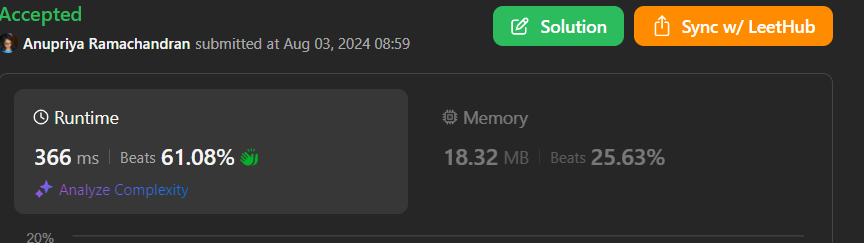

In [1]:
from typing import List

class Solution:
    def countServers(self, grid: List[List[int]]) -> int:
        rows, cols = len(grid),len(grid[0])
        rowmap = [0]* rows
        colmap = [0]* cols

        ans  = 0
        for i in range(rows):
            for j in range(cols):
                if grid[i][j] == 1:
                    rowmap[i] += 1
                    colmap[j] += 1

        for i in range(rows):
            for j in range(cols):
                if grid[i][j] == 1 and (rowmap[i] > 1 or colmap[j] > 1):
                    ans += 1

        return ans      

# Approach Using Union FInd
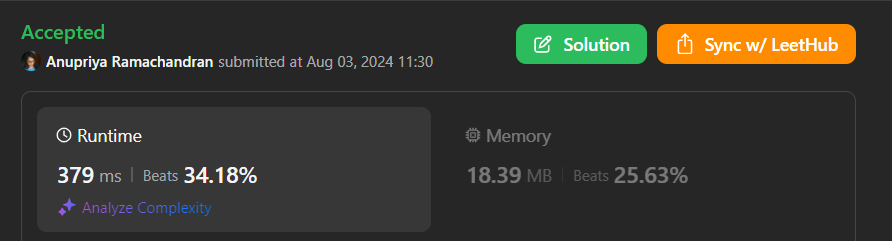

In [7]:
from typing import List
import collections

class Solution:
    def countServers(self, grid: List[List[int]]) -> int:        
        rows, cols = len(grid),len(grid[0])
        uf = {}
        computer = []
        for i in range(rows):
            for j in range(cols):
                if grid[i][j] == 1:
                    computer.append((i, j + rows))

        print(f"computers: {computer}")

        def find(x):
            if x not in uf:
                uf[x] = x
                
            if uf[x] != x:
                uf[x] = find(uf[x])
            return uf[x]

        def union(x, y):
            root_x = find(x)
            root_y = find(y)
            uf[root_x] = root_y

        for x , y in computer:
            union(x, y)
        print(f"union completed, uf : {uf}")
        counter = collections.Counter([find(i) for i, _ in computer])
        print(f"counter: {counter}")
        return sum([i if i > 1 else 0 for i in counter.values()])

In [8]:
grid =[[1,1,0,0],[0,0,1,0],[0,0,1,0],[0,0,0,1]]
sol = Solution()
sol.countServers(grid)

computers: [(0, 4), (0, 5), (1, 6), (2, 6), (3, 7)]
union completed, uf : {0: 4, 4: 5, 5: 5, 1: 6, 6: 6, 2: 6, 3: 7, 7: 7}
counter: Counter({5: 2, 6: 2, 7: 1})


4